##Carga de librerias y Datos

In [33]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

datos = pd.read_json(url)
data = pd.json_normalize(datos.to_dict(orient='records'), sep='_')

data

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##Limpieza de Datos

In [35]:
nulos = data.isna().sum()

vacios_exactos = data.eq("").sum()

solo_espacios = data.applymap(
    lambda x: isinstance(x, str) and (x != "") and (x.strip() == "")
).sum()

faltantes_totales = nulos + vacios_exactos + solo_espacios

resumen_faltantes = pd.DataFrame({
    "NaN": nulos,
    "'' (vacío exacto)": vacios_exactos,
    "' ' (solo espacios)": solo_espacios,
    "TOTAL faltantes": faltantes_totales
})

resumen_faltantes


/tmp/ipython-input-2061623196.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  solo_espacios = data.applymap(


,NaN,'' (vacío exacto),' ' (solo espacios),TOTAL faltantes
customerID,0,0,0,0
Churn,0,224,0,224
customer_gender,0,0,0,0
customer_SeniorCitizen,0,0,0,0
customer_Partner,0,0,0,0
customer_Dependents,0,0,0,0
customer_tenure,0,0,0,0
phone_PhoneService,0,0,0,0
phone_MultipleLines,0,0,0,0
internet_InternetService,0,0,0,0


In [36]:
data_limpia = data[
    (data['Churn'].map(lambda x: not (isinstance(x, str) and x.strip() == ""))) &
    (data['account_Charges_Total'].map(lambda x: not (isinstance(x, str) and x.strip() == "")))
].copy()

print(f"Registros originales: {len(data)}")
print(f"Registros limpios: {len(data_limpia)}")

data_limpia

Registros originales: 7267
Registros limpios: 7032


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##Columna: Cuentas_Diarias

In [37]:
data_limpia['Cuentas_Diarias'] = (data_limpia['account_Charges_Monthly'] / 30).round(2)

data_limpia

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


##Estandarización de Datos

In [38]:
cols_yes_no = [col for col in data_limpia.columns if set(data_limpia[col].unique()) <= {"Yes", "No"}]
for col in cols_yes_no:
    data_limpia[col] = data_limpia[col].map({"Yes": 1, "No": 0})

renombres = {
    "customerID": "cliente_id",
    "Churn": "abandono",
    "customer_gender": "cliente_genero",
    "customer_SeniorCitizen": "cliente_ciudadano_senior",
    "customer_Partner": "cliente_pareja",
    "customer_Dependents": "cliente_dependientes",
    "customer_tenure": "cliente_antiguedad_meses",
    "phone_PhoneService": "telefono_servicio",
    "phone_MultipleLines": "telefono_lineas_multiples",
    "internet_InternetService": "internet_servicio",
    "internet_OnlineSecurity": "internet_seguridad_en_linea",
    "internet_OnlineBackup": "internet_respaldo_en_linea",
    "internet_DeviceProtection": "internet_proteccion_dispositivo",
    "internet_TechSupport": "internet_soporte_tecnico",
    "internet_StreamingTV": "internet_streaming_tv",
    "internet_StreamingMovies": "internet_streaming_peliculas",
    "account_Contract": "cuenta_contrato",
    "account_PaperlessBilling": "cuenta_facturacion_sin_papel",
    "account_PaymentMethod": "cuenta_metodo_pago",
    "account_Charges_Monthly": "cuenta_cargos_mensuales",
    "account_Charges_Total": "cuenta_cargos_totales",
    "Cuentas_Diarias": "cuentas_diarias"
}

data_limpia.rename(columns=renombres, inplace=True)

cols_numericas = ["cuenta_cargos_mensuales", "cuenta_cargos_totales", "cuentas_diarias"]
for col in cols_numericas:
    data_limpia[col] = pd.to_numeric(data_limpia[col], errors="coerce")

data_limpia.head()


,cliente_id,abandono,cliente_genero,cliente_ciudadano_senior,cliente_pareja,cliente_dependientes,cliente_antiguedad_meses,telefono_servicio,telefono_lineas_multiples,internet_servicio,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_sin_papel,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


##Análisis Descriptivo

In [39]:
data_limpia.describe()


,abandono,cliente_ciudadano_senior,cliente_pareja,cliente_dependientes,cliente_antiguedad_meses,telefono_servicio,cuenta_facturacion_sin_papel,cuenta_cargos_mensuales,cuenta_cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159891
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002955
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.187500
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [40]:
descripcion = data_limpia.describe().T

descripcion["median"] = data_limpia.median(numeric_only=True)

descripcion = descripcion[["count", "mean", "median", "std", "min", "25%", "50%", "75%", "max"]]

descripcion


,count,mean,median,std,min,25%,50%,75%,max
abandono,7032.0,0.265785,0.000,0.441782,0.00,0.0000,0.000,1.0000,1.00
cliente_ciudadano_senior,7032.0,0.162400,0.000,0.368844,0.00,0.0000,0.000,0.0000,1.00
cliente_pareja,7032.0,0.482509,0.000,0.499729,0.00,0.0000,0.000,1.0000,1.00
cliente_dependientes,7032.0,0.298493,0.000,0.457629,0.00,0.0000,0.000,1.0000,1.00
cliente_antiguedad_meses,7032.0,32.421786,29.000,24.545260,1.00,9.0000,29.000,55.0000,72.00
telefono_servicio,7032.0,0.903299,1.000,0.295571,0.00,1.0000,1.000,1.0000,1.00
cuenta_facturacion_sin_papel,7032.0,0.592719,1.000,0.491363,0.00,0.0000,1.000,1.0000,1.00
cuenta_cargos_mensuales,7032.0,64.798208,70.350,30.085974,18.25,35.5875,70.350,89.8625,118.75
cuenta_cargos_totales,7032.0,2283.300441,1397.475,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
cuentas_diarias,7032.0,2.159891,2.340,1.002955,0.61,1.1875,2.340,2.9925,3.96


##Recuento de evasión por variables categóricas

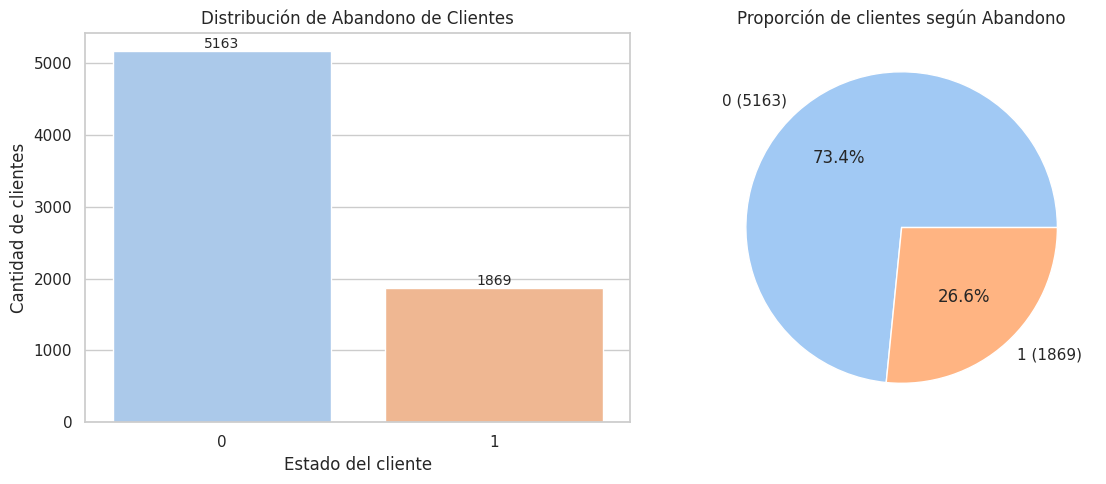

In [41]:
conteo_abandono = data_limpia['abandono'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.countplot(data=data_limpia, x='abandono', hue='abandono', palette='pastel', legend=False, ax=axes[0])
ax1.set_title('Distribución de Abandono de Clientes')
ax1.set_xlabel('Estado del cliente')
ax1.set_ylabel('Cantidad de clientes')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

axes[1].pie(conteo_abandono,
            labels=[f"{label} ({valor})" for label, valor in zip(conteo_abandono.index, conteo_abandono.values)],
            autopct='%1.1f%%',
            colors=sns.color_palette('pastel'))
axes[1].set_title('Proporción de clientes según Abandono')

plt.tight_layout()
plt.show()

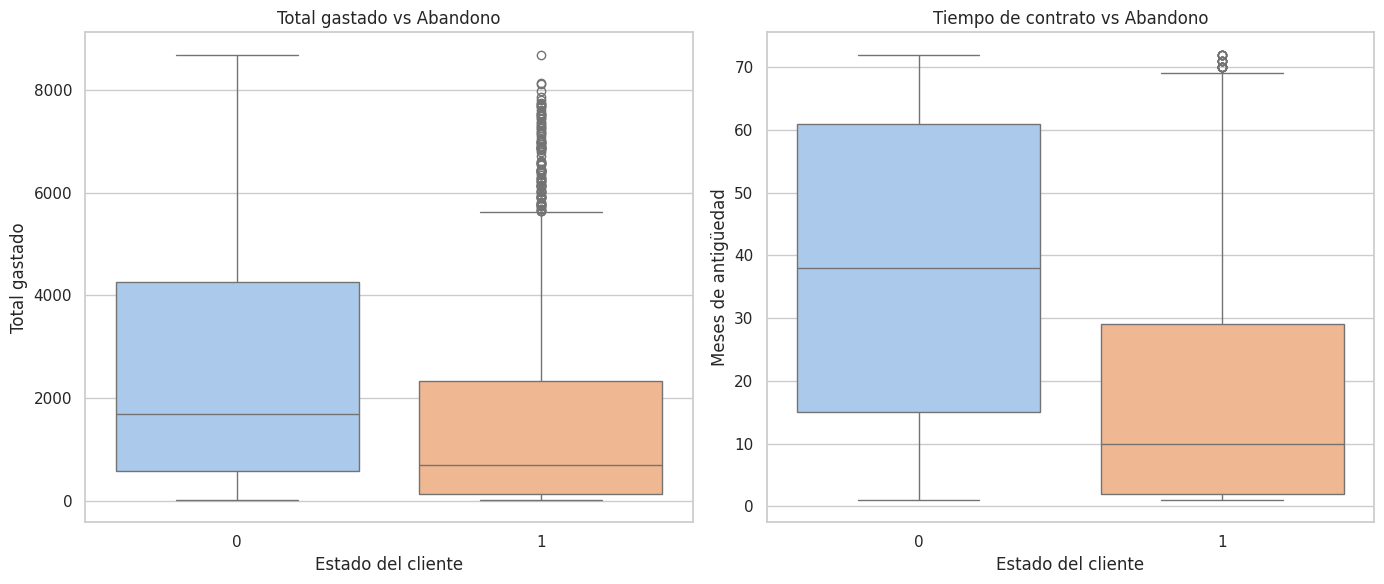

In [42]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(
    data=data_limpia, x='abandono', y='cuenta_cargos_totales',
    hue='abandono', palette='pastel', legend=False, ax=axes[0]
)
axes[0].set_title("Total gastado vs Abandono")
axes[0].set_xlabel("Estado del cliente")
axes[0].set_ylabel("Total gastado")


sns.boxplot(
    data=data_limpia, x='abandono', y='cliente_antiguedad_meses',
    hue='abandono', palette='pastel', legend=False, ax=axes[1]
)
axes[1].set_title("Tiempo de contrato vs Abandono")
axes[1].set_xlabel("Estado del cliente")
axes[1].set_ylabel("Meses de antigüedad")

plt.tight_layout()
plt.show()


# **Informe Final – Análisis de Evasión de Clientes**

## **1. Introducción**
El objetivo de este análisis es comprender los factores que influyen en la **evasión de clientes (churn)** en una empresa de telecomunicaciones. El *churn* se refiere a clientes que cancelan su servicio, y su reducción es crucial para mantener ingresos estables y optimizar estrategias de retención.  
A partir de un dataset proporcionado por la empresa, se realizó un análisis completo que incluye limpieza de datos, exploración y visualización de patrones para obtener conclusiones y recomendaciones estratégicas.

---

## **2. Limpieza y Tratamiento de Datos**
**Pasos realizados:**
- **Importación de datos** desde un archivo JSON alojado en GitHub.
- **Identificación de valores faltantes** considerando:
  - `NaN`
  - Cadenas vacías (`""`)
  - Valores compuestos solo por espacios (`"   "`)
- **Eliminación de registros incompletos** en columnas clave como `Churn` y `account_Charges_Total`.
- **Creación de nuevas variables**:
  - `Cuentas_Diarias`: gasto mensual dividido por 30.
- **Estandarización**:
  - Transformación de variables binarias `Yes/No` a `1/0`.
  - Renombrado de columnas a nombres descriptivos en español.
  - Conversión de variables numéricas a tipo numérico.

**Resultado:**
- Registros originales: **7,267**
- Registros limpios: **7,032**

---

## **3. Análisis Exploratorio de Datos**
Se analizaron tanto variables categóricas como numéricas para identificar patrones relacionados con el abandono.

### **3.1 Distribución de abandono**
- **26.6%** de clientes abandonaron el servicio.
- **73.4%** permanecen activos.

### **3.2 Comparativa de variables numéricas**
- Clientes con **mayor gasto total** tienden a presentar diferentes tasas de abandono.
- La **antigüedad del cliente** también parece influir: clientes con menos meses de contrato abandonan con mayor frecuencia.

---

## **4. Conclusiones e Insights**
- El abandono de clientes es significativo (más de una cuarta parte de la base actual).
- Clientes con **baja antigüedad** muestran una tendencia más alta a abandonar.
- El gasto mensual y total presenta diferencias entre clientes que permanecen y los que se retiran, lo que sugiere que el precio o el valor percibido del servicio podría ser un factor.
- La mayoría de las variables binarias (`servicios contratados, facturación sin papel, método de pago`) pueden usarse para segmentar clientes y generar alertas tempranas.

---

## **5. Recomendaciones**
- **Programas de fidelización temprana** para clientes con menos de 12 meses de servicio.
- **Revisión de planes y precios** para clientes con gastos elevados y riesgo de abandono.
- **Campañas personalizadas** basadas en patrones de uso y servicios contratados.
- **Monitoreo continuo** con modelos predictivos para identificar clientes con alta probabilidad de churn y actuar antes de que cancelen.
